In [90]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

In [91]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler 
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_squared_error 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [92]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv') 
# data.head(1)
# data.info()

In [93]:
# data.isna().sum() * 100 / len(data)

data.duplicated().sum()
data.drop_duplicates(subset=None, inplace=True, ignore_index=False, keep='first')
data.duplicated().sum()

0

In [94]:
# data.corr()['target'].sort_values(ascending=False)


<AxesSubplot:title={'center':'Correlation Table'}>

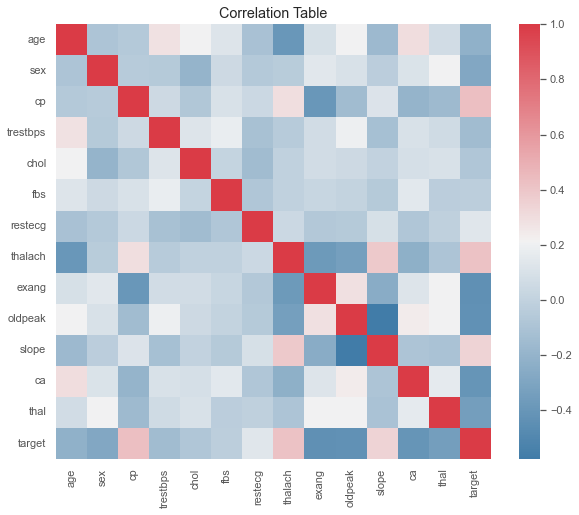

In [95]:
f,ax = plt.subplots(figsize=(10,8)) 
ax.set_title('Correlation Table')

data_corr = data.corr()
sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(240,10,as_cmap=True), square=True, ax=ax)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Boxplot'}, xlabel='chol'>

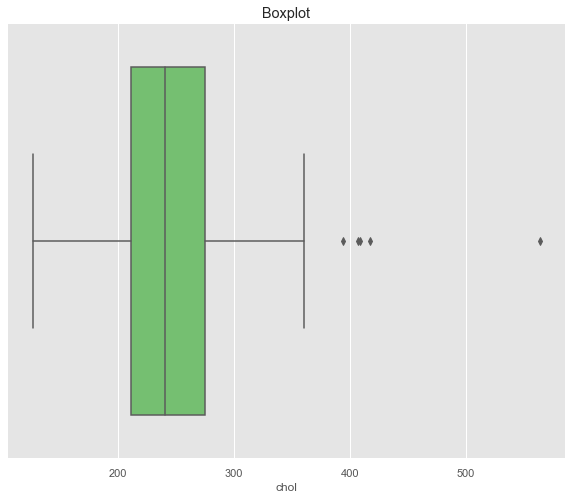

In [96]:
f,ax = plt.subplots(figsize=(10,8)) 
ax.set_title('Boxplot')
sns.boxplot(data.chol, ax=ax, color='g')

In [97]:
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_val = ['age','trestbps','chol','thalach','oldpeak' ]
x = data.drop(columns=['target'], axis=1)
y = data.target 
orig_sex_val = data.sex

In [98]:
trans_column = ColumnTransformer([ 
    ('num', StandardScaler(),num_val),('cat', OrdinalEncoder(),cat_val)
])
x = pd.DataFrame(trans_column.fit_transform(x))


In [99]:
x_train, x_test,y_train,y_test =train_test_split(x,y, test_size=0.3, random_state=42)

In [100]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test) 
ac_scr = accuracy_score(y_test,y_pred).round(3)

mod_per_acu = pd.DataFrame([ 
    'LogisticRegression',ac_scr
]).transpose()
mod_per_acu.columns = ['Method', 'Test Accuracy Score']
mod_per_acu

,Method,Test Accuracy Score
0,LogisticRegression,0.824


<AxesSubplot:xlabel='Predicted', ylabel='True'>

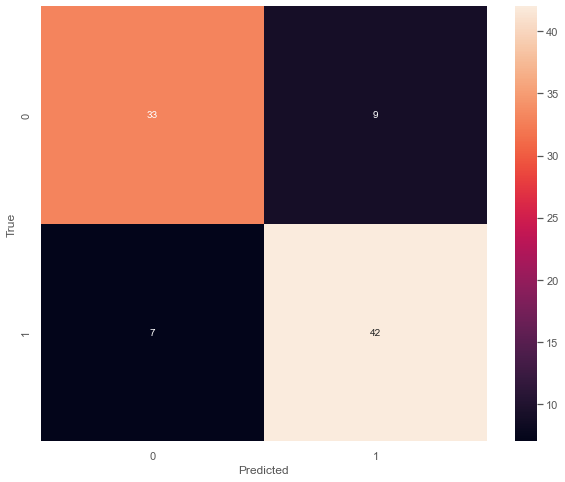

In [101]:
cm_dic = { 
    'y_test': y_test,
    'y_pred': y_pred
}

cm_cols = pd.DataFrame( 
    cm_dic, columns=['y_test', 'y_pred']
)

confusion_matrix = pd.crosstab(cm_cols['y_test'], cm_cols['y_pred'], rownames=['True'], colnames=['Predicted'])

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Knn Line Plot'}>

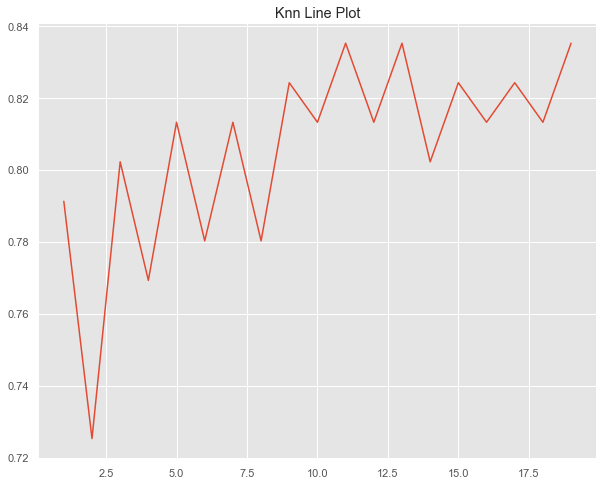

In [102]:
accuracies = []

for N in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)

    accu = accuracy_score(y_test,y_pred)
    accuracies.append(accu)

accuracies = np.array(accuracies)

f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Knn Line Plot')

sns.lineplot(np.arange(1,20),accuracies)

In [103]:
best_k = 1 + np.argmax(accuracies)
best_accur = np.max(accuracies)

mod_tun = pd.DataFrame([ 
    'KNeighborsClassifier', best_k, best_accur
]).transpose()
mod_tun.columns = ['Method', 'Best K', 'Best Accuracy']
mod_tun

,Method,Best K,Best Accuracy
0,KNeighborsClassifier,11,0.835165
